In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from superpoint.settings import EXPER_PATH
import superpoint.evaluations.detector_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [27]:
exp = [
    'mp_synth-v5_aug_reg-001_estop-60000_hp-v-repeat',
    'mp_synth-v5_aug_reg-001_estop-60000_ha2-100-3_hp-v-repeat',
    'harris_hp-v-repeat',
]
names = ['MagicPoint', 'MagicPoint after 2 adaptations', 'Harris']
thresh = 1/65.
num_points = 300

In [28]:
def draw_keypoints(img, corners, color, radius=3, s = 3):
    img = np.repeat(cv2.resize(img, None, fx=s, fy=s)[..., np.newaxis], 3, -1)
    for c in np.stack(corners).T:
        cv2.circle(img, tuple(s*np.flip(c, 0)), radius, color, thickness=-1)
    return img

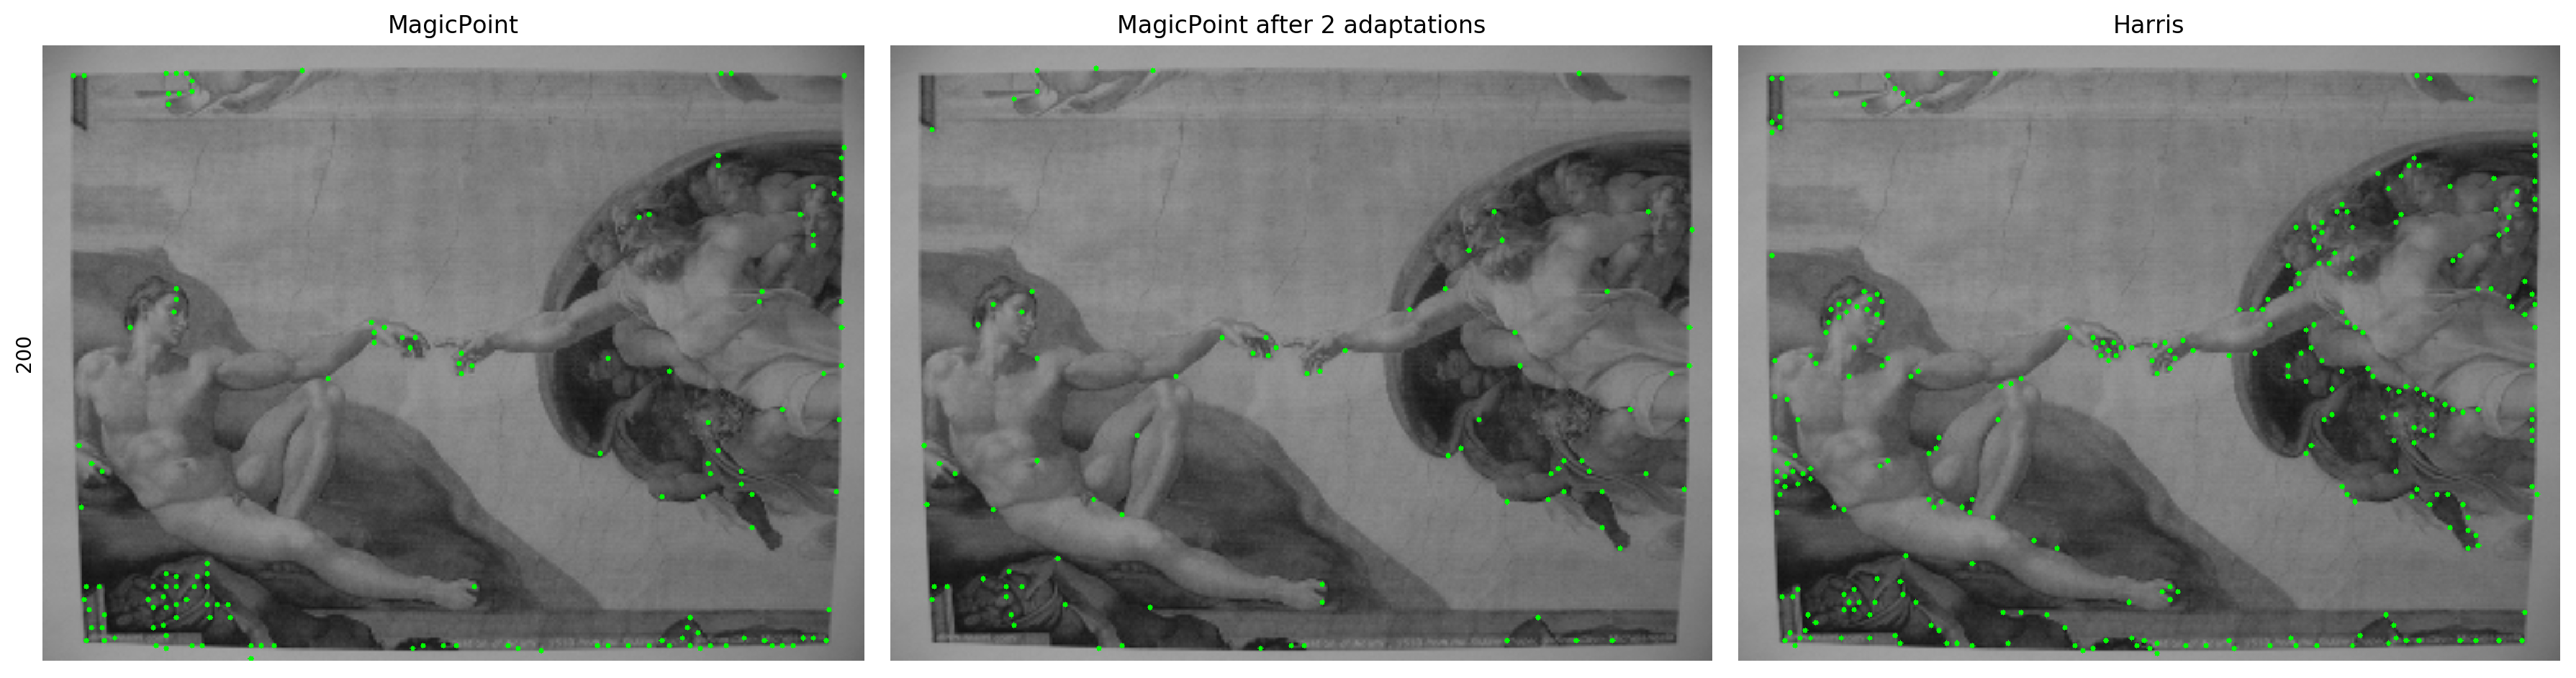

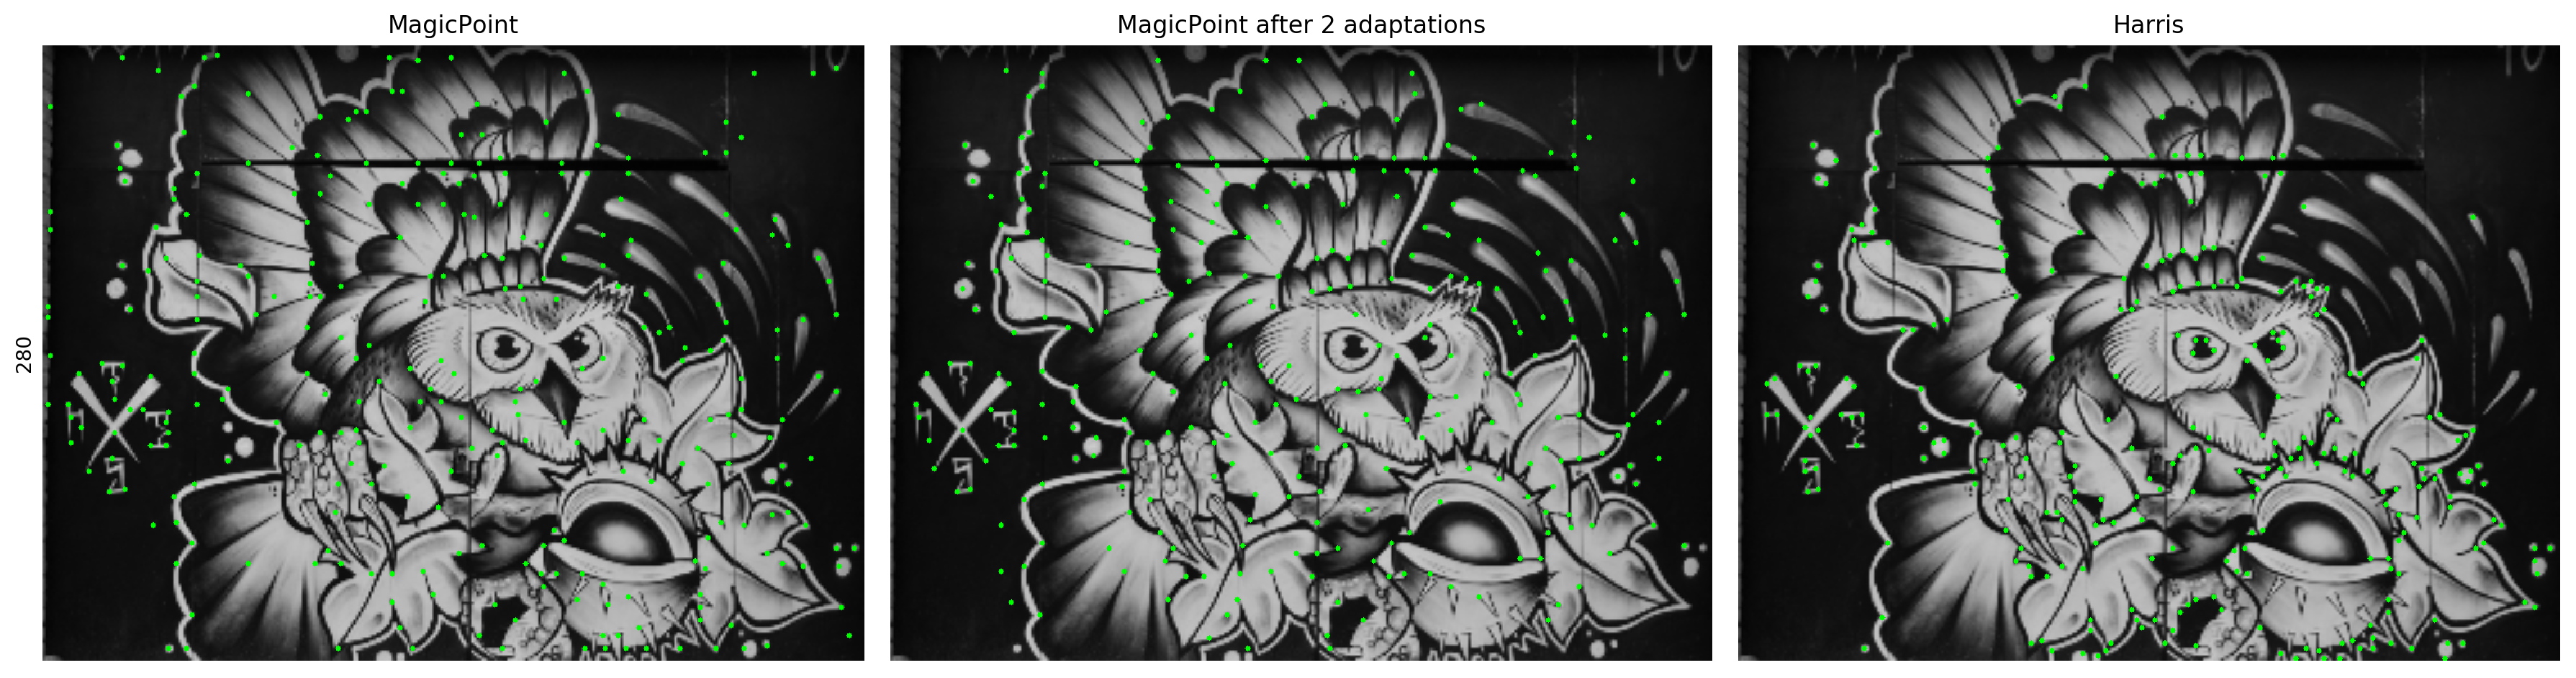

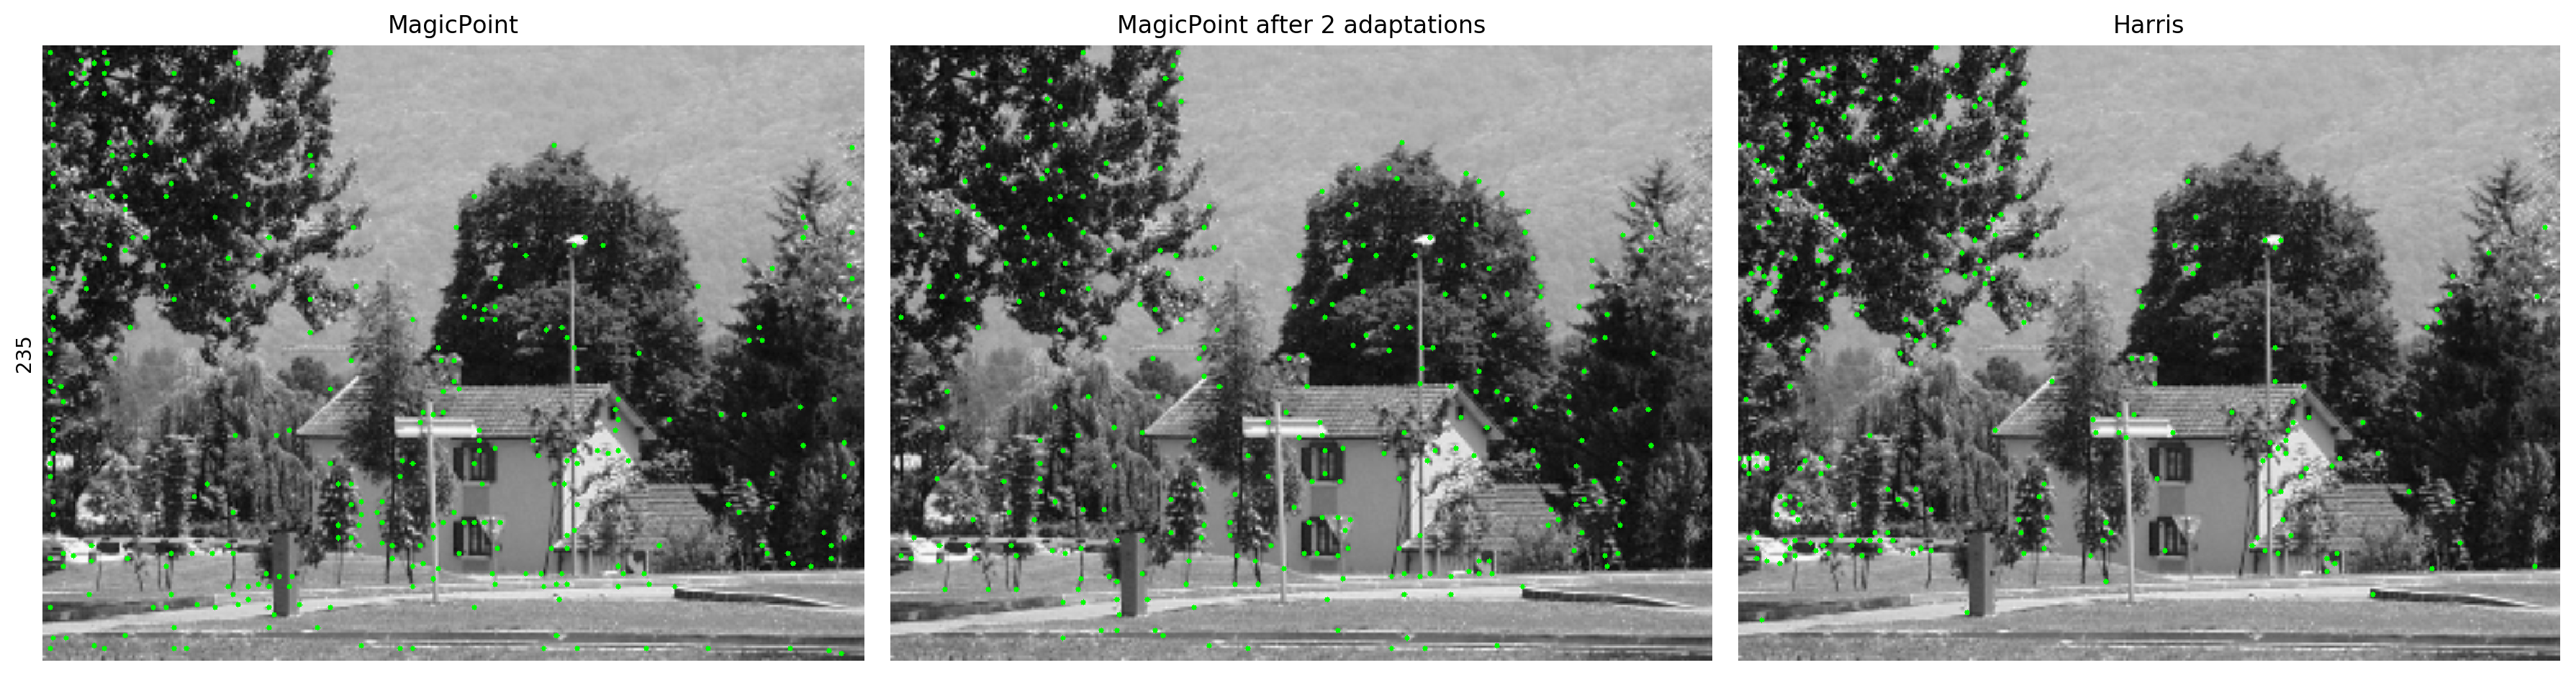

In [29]:
for i in [200, 280, 235]:
    ims = []
    for e in exp:
        path = Path(EXPER_PATH, "outputs", e, str(i) + ".npz")
        d = np.load(path)
        
        points1 = np.where(d['prob'] > thresh)
        idx = np.argsort(d['prob'][points1])[::-1][:num_points]
        points1 = (points1[0][idx], points1[1][idx])
        ims.append(draw_keypoints(d['image'], points1, (0, 255, 0)) / 255.)
    plot_imgs(ims, ylabel=i, titles=names, dpi=200, cmap='gray')